## Exerício de KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/KNN_Project_Data'
df = pd.read_csv(caminho)

In [3]:
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

### Exploração dos dados

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


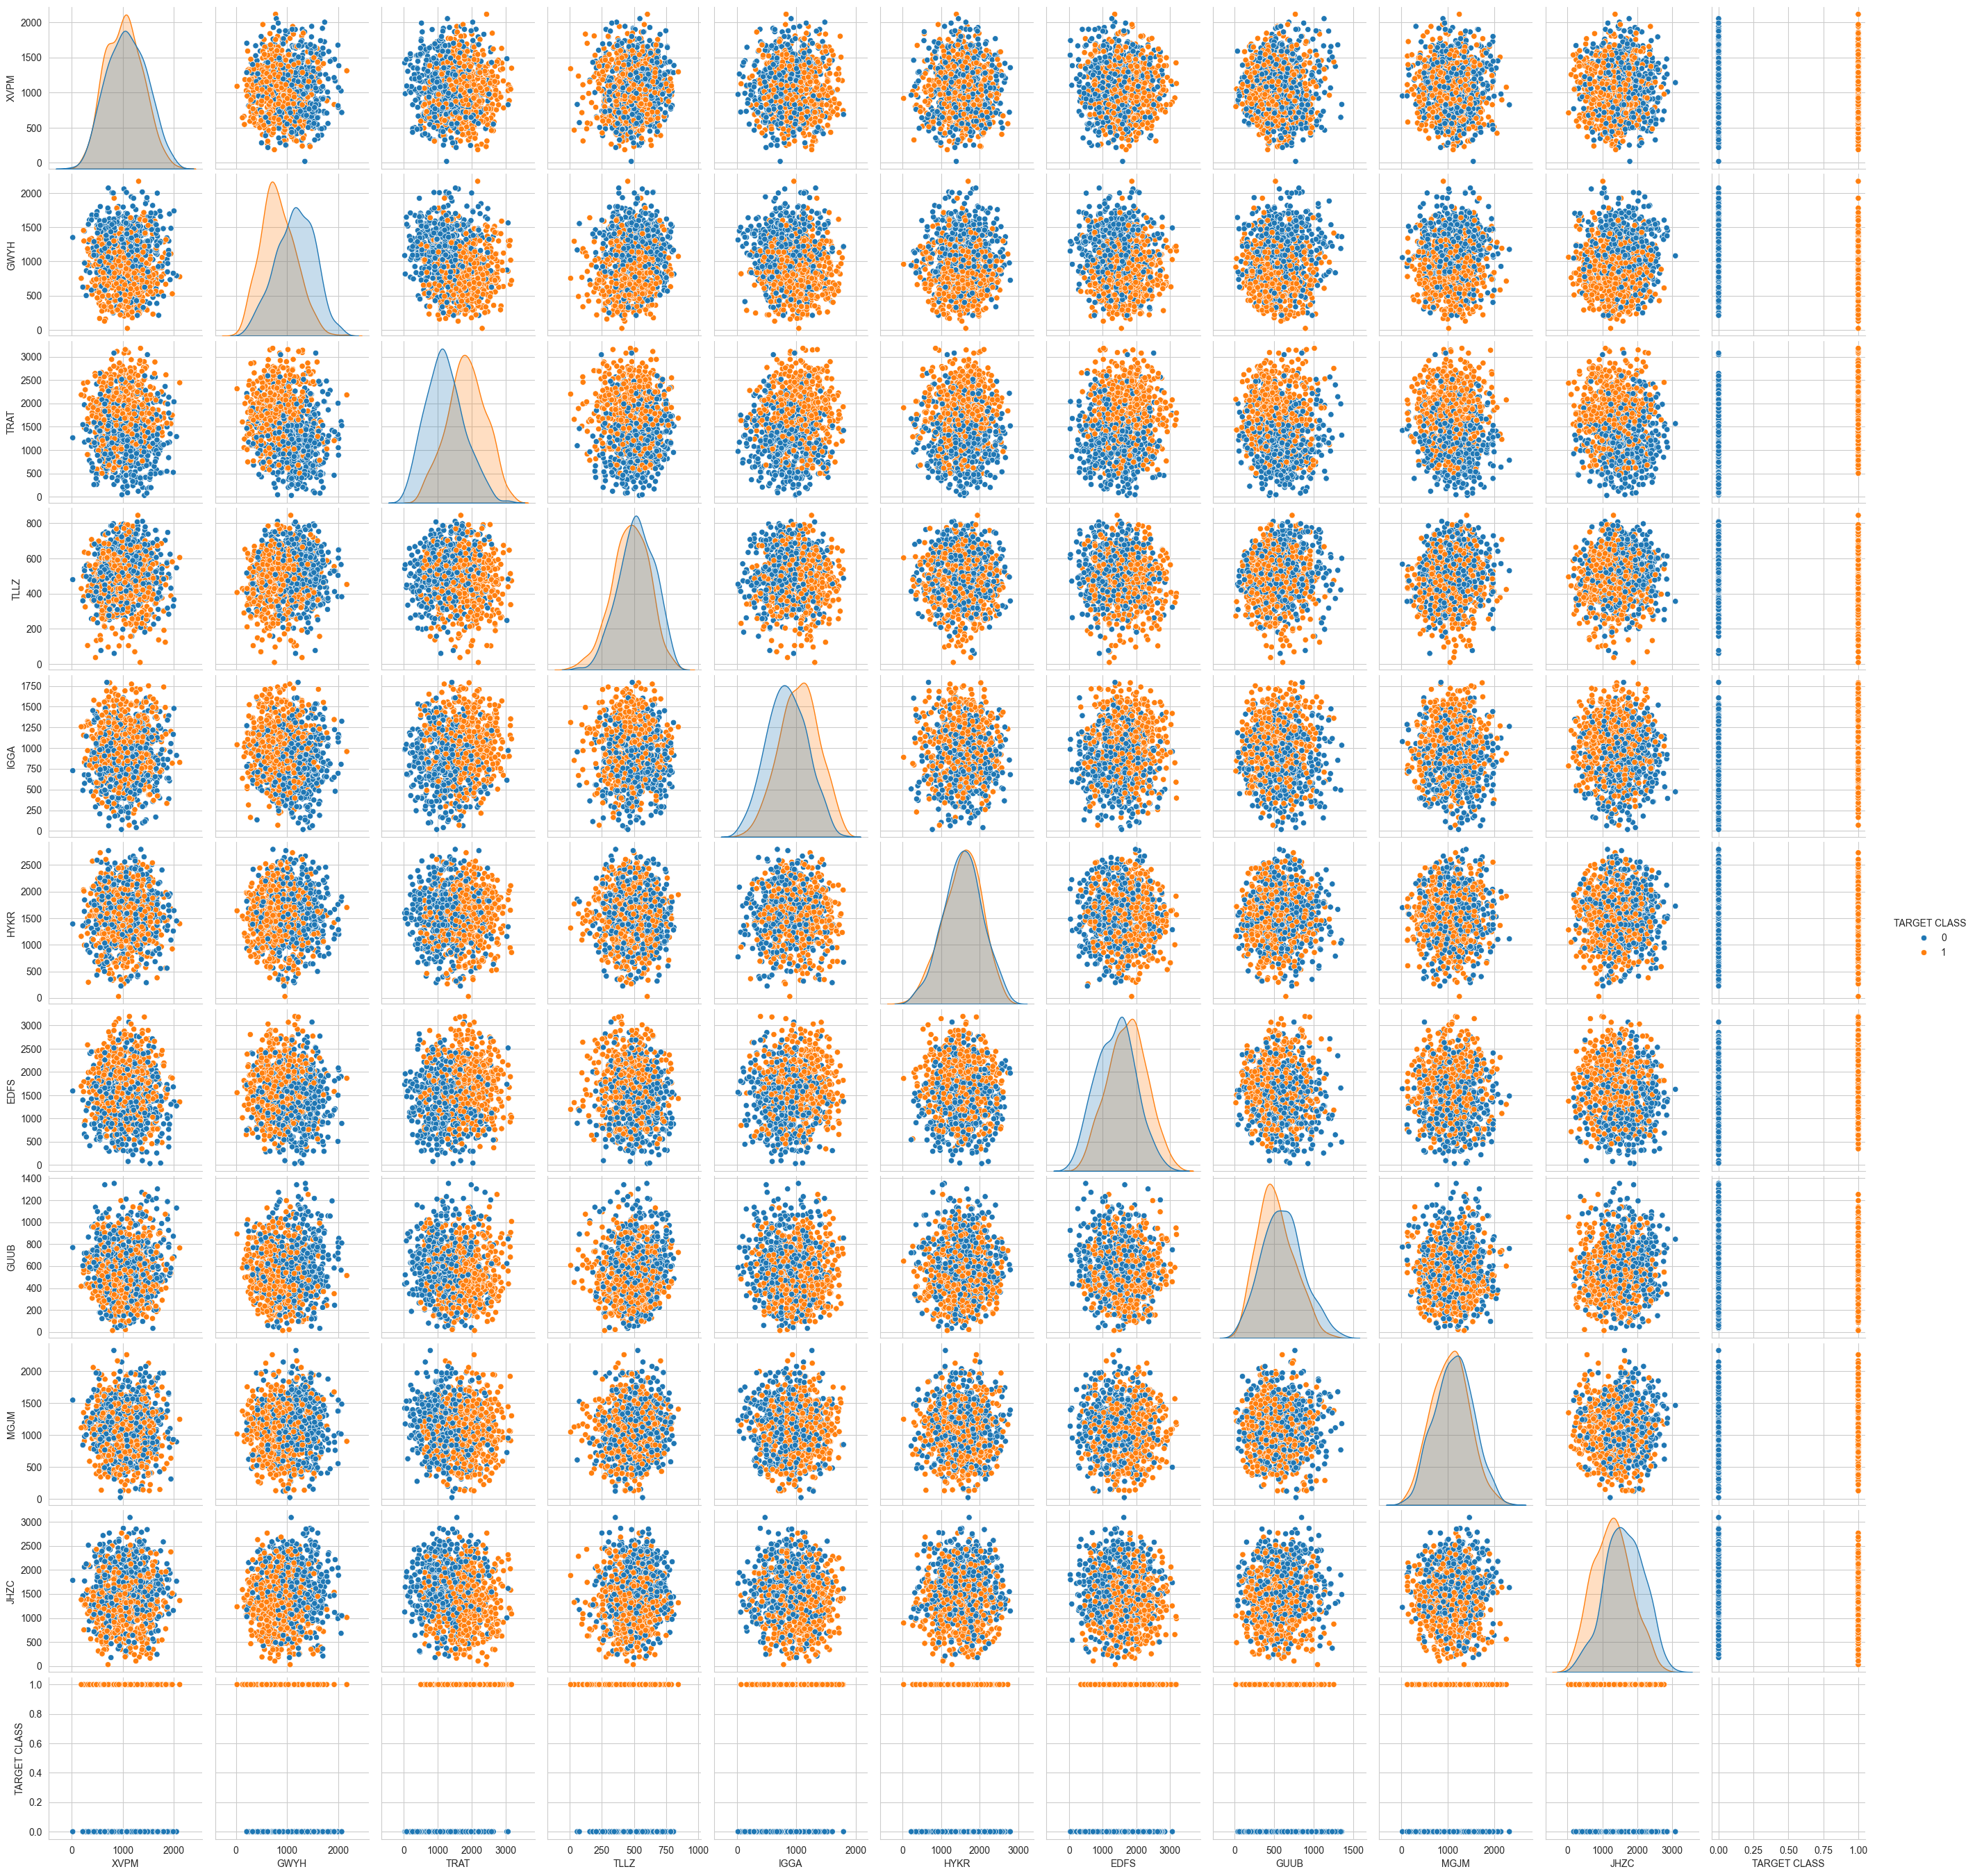

In [6]:
sns.pairplot(df, vars=df.columns, hue='TARGET CLASS')

### Normalizção dos dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [10]:
dados_normalizados = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [11]:
df_normalizado = pd.DataFrame(dados_normalizados, columns=df.columns[:-1])

In [12]:
df_normalizado.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [13]:
round(df_normalizado.describe(), 0)

XVPM    GWYH    TRAT    TLLZ    IGGA    HYKR    EDFS    GUUB    MGJM  \
count  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0  1000.0   
mean      0.0     0.0     0.0     0.0    -0.0    -0.0    -0.0    -0.0    -0.0   
std       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
min      -3.0    -2.0    -2.0    -3.0    -3.0    -3.0    -3.0    -2.0    -3.0   
25%      -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0   
50%      -0.0    -0.0    -0.0     0.0    -0.0     0.0     0.0    -0.0     0.0   
75%       1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   
max       3.0     3.0     3.0     2.0     2.0     3.0     3.0     3.0     3.0   

         JHZC  
count  1000.0  
mean      0.0  
std       1.0  
min      -3.0  
25%      -1.0  
50%      -0.0  
75%       1.0  
max       3.0

### Separação dos dados de teste

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df_normalizado.copy()
y = df['TARGET CLASS'].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelo KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Avaliação do modelo

In [20]:
pred = knn.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [22]:
print('Matriz de Confusao:')
print(confusion_matrix(y_test, pred))

Matriz de Confusao:
[[109  43]
 [ 41 107]]


In [23]:
print('Relatório de Classificação:')
print(classification_report(y_test, pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



### Escolhendo o Valor de K

In [24]:
error_rate = []

In [25]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))


Text(0, 0.5, 'Error Rate')

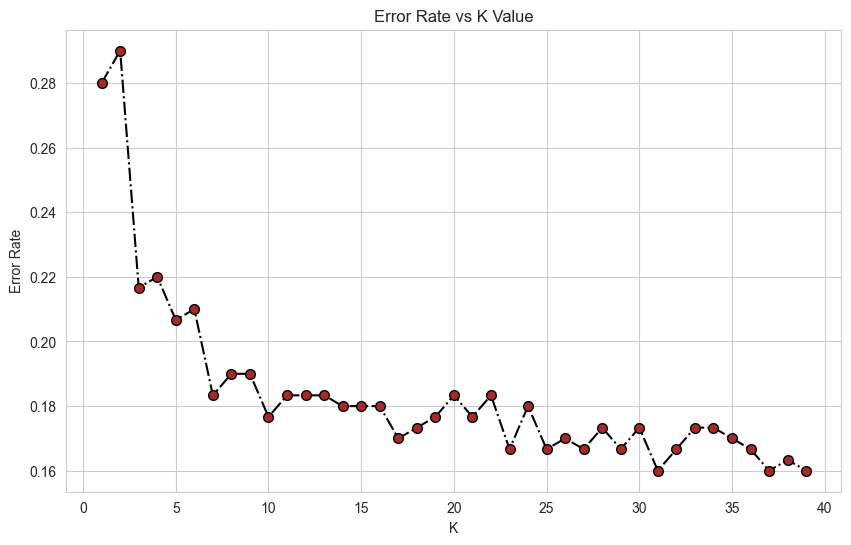

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate,
        color='black', linestyle='-.',
        marker='o', markerfacecolor='brown',
        markersize=7)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Para K = 17

In [27]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [28]:
print('Matriz de Confusao:')
print(confusion_matrix(y_test, pred))

Matriz de Confusao:
[[124  28]
 [ 23 125]]


In [29]:
print('Relatório de Classificação:')
print(classification_report(y_test, pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



Para K = 31

In [30]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [31]:
print('Matriz de Confusao:')
print(confusion_matrix(y_test, pred))

Matriz de Confusao:
[[123  29]
 [ 19 129]]


In [32]:
print('Relatório de Classificação:')
print(classification_report(y_test, pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

